<a href="https://colab.research.google.com/github/Sf99-lab/Python-Learning/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Find the occurrences  of the articles(a, an, the) in the file RomeoAndJuliet.

2) Create a bar chart of the occurrences found above.

3) Find the least occurring 100 words with occurrences greater than 10 in the text file provided and plot a bar chart.

4) Build a word cloud of top 500 occurring words in the provided text file.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[525, 90, 864]


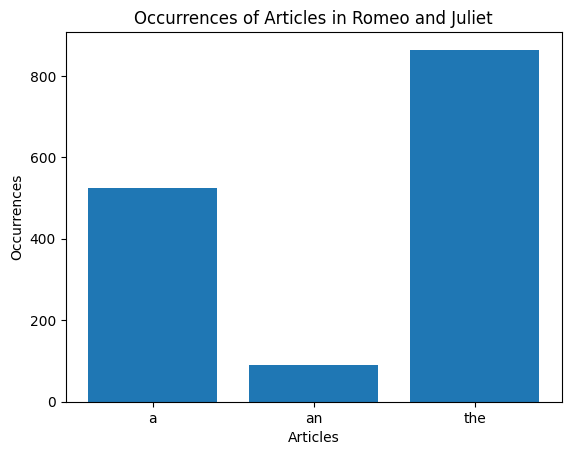

In [ ]:
import nltk
nltk.download('punkt')
import pathlib
from textblob import TextBlob
import matplotlib.pyplot as plt

blob = TextBlob(pathlib.Path("/content/sample_data/RomeoAndJuliet.txt").read_text())

a_count = blob.words.count('a')
an_count = blob.words.count('an')
the_count = blob.words.count('the')

x = []
y = ['a', 'an', 'the']
x.extend([a_count, an_count, the_count])
print(x)

plt.bar(y, x)
plt.xlabel('Articles')
plt.ylabel('Occurrences')
plt.title('Occurrences of Articles in Romeo and Juliet')
plt.show()



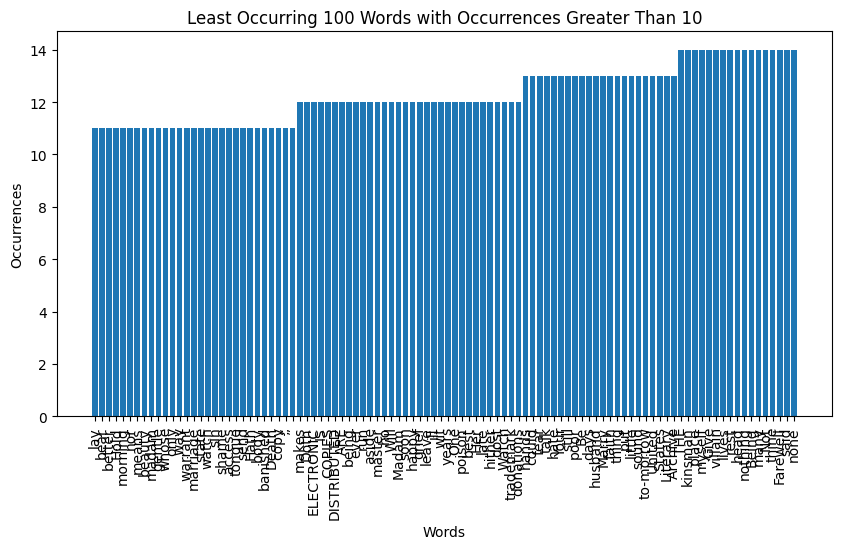

In [ ]:
import collections
blob = TextBlob(pathlib.Path("/content/sample_data/RomeoAndJuliet.txt").read_text())

counter = collections.Counter(blob.words)

least_common = [item for item in counter.items() if item[1] > 10]
least_common.sort(key=lambda x: x[1])
least_common = least_common[:100]

words, occurrences = zip(*least_common)

plt.figure(figsize=(10, 5))
plt.bar(words, occurrences)
plt.xlabel('Words')
plt.ylabel('Occurrences')
plt.title('Least Occurring 100 Words with Occurrences Greater Than 10')
plt.xticks(rotation=90)
plt.show()


<ipython-input-9-1324b6673e4c>:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_image = imageio.imread('/content/sample_data/mask_image.png')


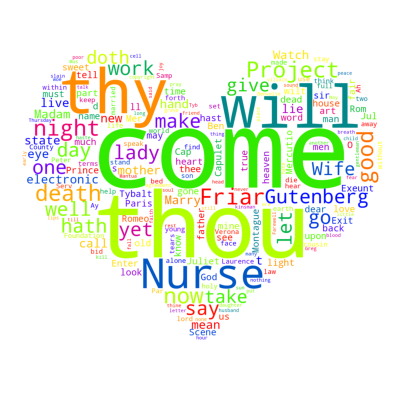

In [ ]:
!pip install wordcloud

from wordcloud import WordCloud
import imageio

blob = TextBlob(pathlib.Path("/content/sample_data/RomeoAndJuliet.txt").read_text())

counter = collections.Counter(blob.words)

most_common = counter.most_common(500)

words, _ = zip(*most_common)
text = ' '.join(words)

mask_image = imageio.imread('/content/sample_data/mask_image.png')
wordcloud = WordCloud(colormap = 'prism', mask = mask_image, background_color = 'white')
wordcloud = wordcloud.generate(text);

wordcloud = wordcloud.to_file('RomeoJuliet.png')

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
